In [158]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [159]:

class Stimulus:
    def __init__(self, stimulus_type="normal", t_stimulus=100, mu=0, sigma=1, scale=1):
        self.stimulus_type = stimulus_type
        self.t_stimulus = t_stimulus
        self.mu = mu
        self.sigma = sigma
        self.scale = scale

        if self.stimulus_type == "gaussian":
            self.norm_distr = stats.norm(mu, sigma)

    def get_stimulus(self,t):
        if self.stimulus_type == "normal":
            if t == self.t_stimulus:
                return 1
            else:
                return 0
        elif self.stimulus_type == "gaussian":
            if abs(self.t_stimulus - t) < 3*self.sigma:
                return self.norm_distr.pdf(t) * scale
            else:
                return 0

class Reward:
    def __init__(self, reward_type="normal", t_reward=200, mu=0, sigma=1, scale=1):
        self.reward_type = reward_type
        self.t_reward = t_reward
        self.mu = mu
        self.sigma = sigma
        self.scale = scale

        if self.reward_type == "gaussian":
            self.norm_distr = stats.norm(mu, sigma)

    def get_reward(self,t):
        if self.reward_type == "normal":
            if t == self.t_reward:
                return 1
            else:
                return 0
        elif self.reward_type == "gaussian":
            if abs(self.t_reward - t) < 3*self.sigma:
                return self.norm_distr.pdf(t) * scale
            else:
                return 0


    

In [160]:
def update_weights(weights, idx_tau, epsilon, delta, idx_t, stimulus):
    weights[idx_tau]+= epsilon * delta[idx_t] * stimulus.get_stimulus(idx_t - idx_tau)
    return weights

def make_predictions(predictions,weights, idx_t, stimulus):
    for idx_tau in range(idx_t):
        predictions[idx_t] += weights[idx_tau] * stimulus.get_stimulus(idx_t - idx_tau)      
    return predictions


In [161]:


def td_learning(n_trials, t_axes, epsilon, stimulus, reward):
    predictions = np.zeros(len(t_axes))
    delta = np.zeros(len(t_axes))

    tau = t_axes.copy()
    weights = np.zeros(len(t_axes))

    n_axes = np.arange(0, n_trials, 1)
    res = np.zeros((n_trials, len(t_axes)))

    for n in range(n_trials):   
        delta = np.zeros(len(t_axes))
        predictions = np.zeros(len(t_axes))
        
        for idx_t,t in enumerate(t_axes):
            predictions = make_predictions(predictions,weights, idx_t, stimulus)
        
        for idx_t,t in enumerate(t_axes):
            if t != t_axes[-1]:
                delta[idx_t] = reward.get_reward(idx_t) + predictions[idx_t+1] - predictions[idx_t]
        
        for idx_t,t in enumerate(t_axes): 
            for idx_tau in range(idx_t):
                old_weights = weights.copy()
                weights = update_weights(old_weights, idx_tau, epsilon, delta, t, stimulus) 
                     
        res[n, :] = delta
    return t_axes, n_axes, res

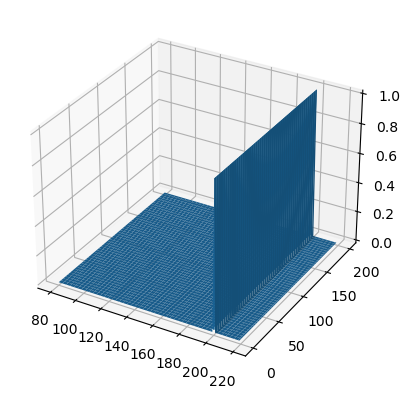

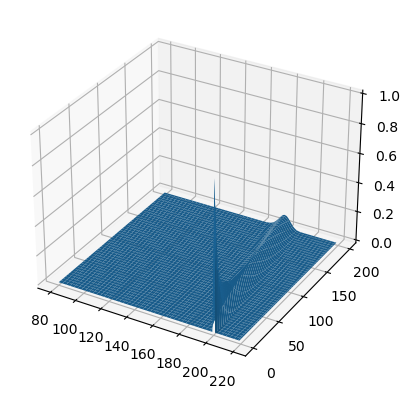

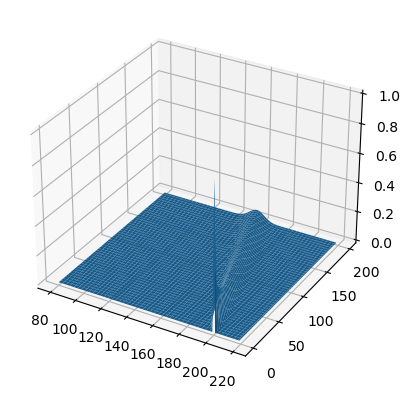

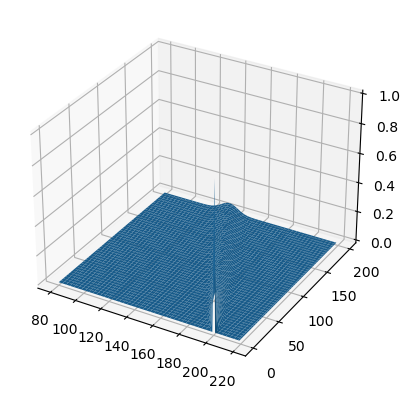

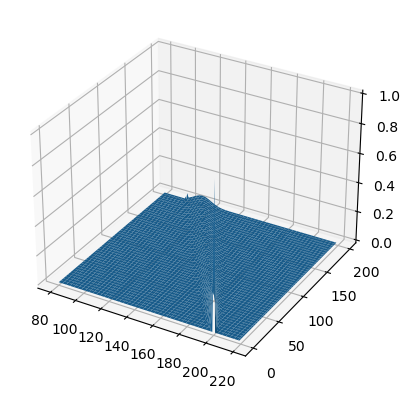

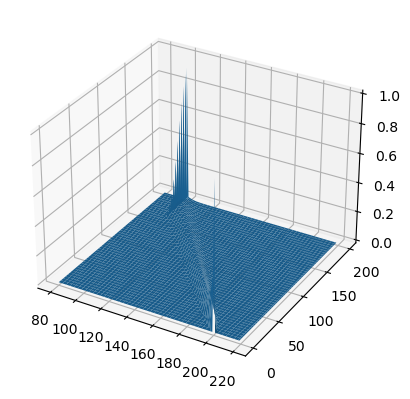

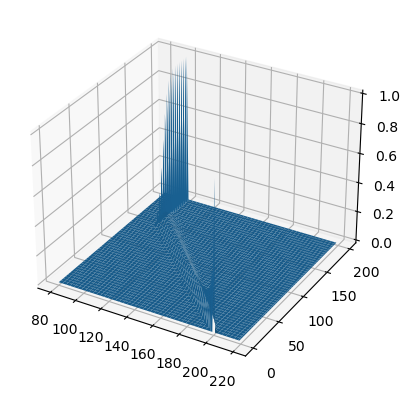

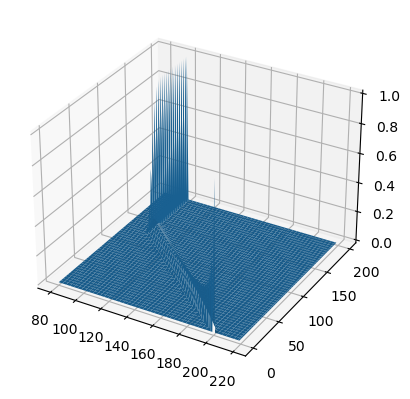

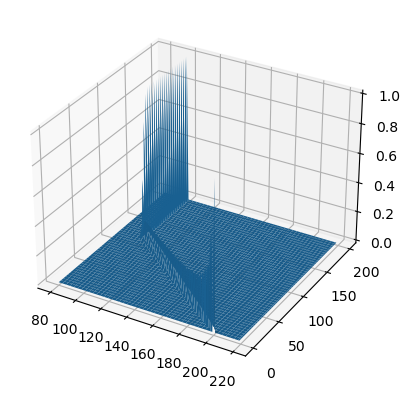

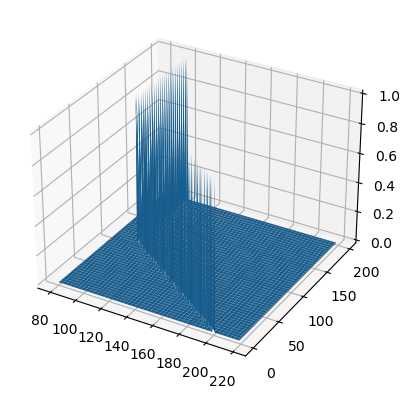

In [168]:
t_steps = 1
trial_time = 250
t_axes = np.arange(0, trial_time, t_steps)
n_trials = 200
epsilon = 0.9

stimulus_type = "normal" # "gaussian" or "normal"
reward_type = "normal" # "gaussian" or "normal"
t_stimulus = 100
t_reward = 200

reward = Reward(reward_type="normal", t_reward=t_reward, mu=t_reward, sigma=1, scale=1)
stimulus = Stimulus(stimulus_type="normal", t_stimulus=t_stimulus, mu=0, sigma=1, scale=1)

for epsilon in np.linspace(0,1,10):
    t_axes, n_axes, res = td_learning(n_trials, t_axes, epsilon, stimulus, reward)

    ax = plt.figure().add_subplot(projection='3d')
    X = t_axes[80:220]
    Y = n_axes
    X, Y = np.meshgrid(X, Y)
    Z = res[:,80:220]

    # Plot the surface with face colors taken from the array we made.
    surf = ax.plot_surface(X, Y, Z)

    # Customize the z axis.
    #cax.set_zlim(0, 2)
    ax.view_init(30, -60) 
    plt.show()


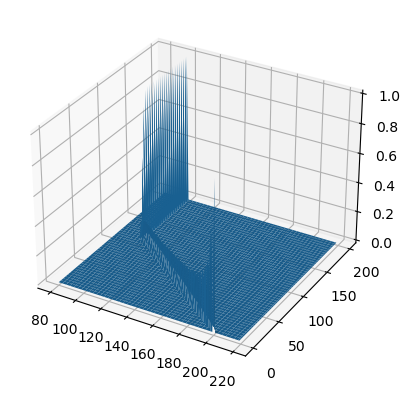